# Script for SNe analytical marginalization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as cm
from scipy.integrate import cumulative_trapezoid, quad, trapezoid
from scipy import integrate
from scipy.interpolate import interp1d
from chainconsumer import Chain, ChainConsumer
import scipy.special as sc
from prettytable import PrettyTable
from IPython.display import display, Math
import corner
from tqdm.auto import tqdm
import time

In [88]:
def likelihood(h, z, om_m, mag_array, mag_err, z_array):
    """ Flat universe """
    # Marginalize over H0
    
    om_k = 0
    om_r = 9.e-5
    om_l = 1 - om_m - om_r - om_k

    d_H = 2997.92458/h
    A = 5 * np.log10(d_H)
    #dA = - 5 / (np.log(10) * h)

    int1 = lambda omega_m, omega_lambda, omega_k, omega_r=9.e-5 : 1/np.sqrt(omega_m * (1 + z)**3 + omega_k * (1 + z)**2 + omega_lambda + omega_r * (1+z)**4 )
    int1 = cumulative_trapezoid(int1(om_m, om_l, om_k), z, initial=0)
    func = interp1d(z, int1)
    int1 = func(z_array)

    B = (5 * np.log10((1 + z_array) * int1)) + 25

    f1 = - 0.5 * np.sum(1 / (mag_err ** 2))
    f2 = - np.sum((B - mag_array) / (mag_err ** 2))
    f3 = - 0.5 * np.sum(((B - mag_array) ** 2 )/ (mag_err ** 2))

    #print(f1, f2, f3)
    
    #integrand = lambda f1, f2, f3, A, dA: dA * np.exp(f3 + (f1 * (A + (f2 / (2 * f1))) ** 2)) 
    integrand = lambda f1, f2, f3, A: np.exp(f3 + (A * f2) + (f1 * A * A))
       
    print(np.exp(f3 + (A * f2) + (f1 * A * A)))
    #print((f3 + (f1 * (A + f2 / (2 * f1)) ** 2)))
    #print(integrand(f1, f2, f3, A, dA))

    marginalized_likelihood = trapezoid(integrand(f1, f2, f3, A), h)#, initial=0)

    #marginalized_likelihood, _ = quad(integrand(f1, f2, f3, A, dA), 0.5, 1.0)
    
    
    return marginalized_likelihood

In [89]:
df = pd.read_csv("SCPUnion2_mu_vs_z.txt", sep="\t", header=None, names=["object_name", "redshift", "magnitude", "error_magnitude"], skiprows=5)

nx = 200

x = np.linspace(0.02, 0.535, nx) # omega_m

saveposteriors = np.ones((nx))

z = np.linspace(0, 2, 1000)
z0 = np.delete(z, 0)

z_array = df['redshift'].to_numpy()
mag_array =  df['magnitude'].to_numpy()
mag_err = df['error_magnitude'].to_numpy()

h_array = np.linspace(0.68, 0.72, 1000)

for i in range(nx):
    saveposteriors[i] = likelihood(h_array, z, x[i], mag_array, mag_err, z_array)

saveposteriors = np.array(saveposteriors)
saveposteriors

[9.22467223e-308 1.41438331e-307 2.16791289e-307 3.32181222e-307
 5.08823196e-307 7.79143263e-307 1.19268665e-306 1.82513100e-306
 2.79203202e-306 4.26977944e-306 6.52753495e-306 9.97589138e-306
 1.52409832e-305 2.32773237e-305 3.55395500e-305 5.42437420e-305
 8.27649051e-305 1.26241367e-304 1.92493500e-304 2.93419779e-304
 4.47117494e-304 6.81103205e-304 1.03720164e-303 1.57896498e-303
 2.40292856e-303 3.65568109e-303 5.55974471e-303 8.45279875e-303
 1.28471076e-302 1.95195308e-302 2.96478079e-302 4.50168424e-302
 6.83308341e-302 1.03685420e-301 1.57281614e-301 2.38505033e-301
 3.61556762e-301 5.47917029e-301 8.30065771e-301 1.25709944e-300
 1.90320778e-300 2.88046263e-300 4.35810590e-300 6.59163013e-300
 9.96660901e-300 1.50647378e-299 2.27633054e-299 3.43849727e-299
 5.19232276e-299 7.83816388e-299 1.18284186e-298 1.78442680e-298
 2.69110428e-298 4.05715942e-298 6.11467532e-298 9.21264923e-298
 1.38757191e-297 2.08923032e-297 3.14468405e-297 4.73181348e-297
 7.11767484e-297 1.070307

array([1.53668012e-192, 3.27593763e-190, 6.05860694e-188, 9.75591133e-186,
       1.37254113e-183, 1.69272388e-181, 1.83582508e-179, 1.75625011e-177,
       1.48636202e-175, 1.11601585e-173, 7.45421846e-172, 4.44073884e-170,
       2.36550897e-168, 1.12945012e-166, 4.84511033e-165, 1.87163819e-163,
       6.52495609e-162, 2.05729670e-160, 5.87865854e-159, 1.52543511e-157,
       3.60156493e-156, 7.75167946e-155, 1.52374137e-153, 2.74044977e-152,
       4.51745399e-151, 6.83717354e-150, 9.51711170e-149, 1.22039610e-147,
       1.44401998e-146, 1.57914498e-145, 1.59859559e-144, 1.50040335e-143,
       1.30770806e-142, 1.06004697e-141, 8.00440260e-141, 5.63900319e-140,
       3.71218828e-139, 2.28719717e-138, 1.32106612e-137, 7.16484021e-137,
       3.65492027e-136, 1.75664612e-135, 7.96874916e-135, 3.41806543e-134,
       1.38886655e-133, 5.35619303e-133, 1.96431420e-132, 6.86407678e-132,
       2.28999873e-131, 7.30863162e-131, 2.23584229e-130, 6.56881390e-130,
       1.85685652e-129, 5

     $\Omega_M$         weight
0      0.020000  1.536680e-192
1      0.022588  3.275938e-190
2      0.025176  6.058607e-188
3      0.027764  9.755911e-186
4      0.030352  1.372541e-183
..          ...            ...
195    0.524648  7.130783e-149
196    0.527236  1.706685e-149
197    0.529824  4.015728e-150
198    0.532412  9.289865e-151
199    0.535000  2.113140e-151

[200 rows x 2 columns]
Results from paper: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

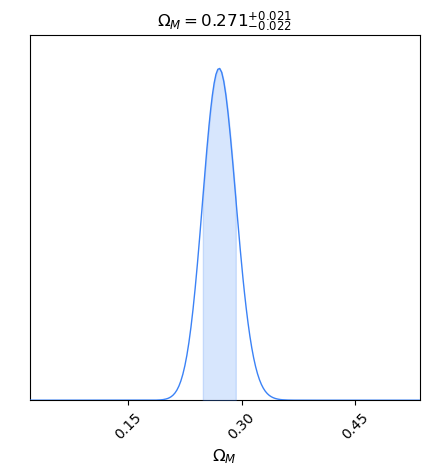

In [90]:
df2 = pd.DataFrame({"$\Omega_M$": x, "weight": saveposteriors})
print(df2)
epsilon = 1e-10
df2["weight"] = df2["weight"].replace(0, epsilon)

c1 = ChainConsumer()
c1.add_chain(Chain(samples=df2, grid=True, name="Grid Data"))
fig = c1.plotter.plot()

## Results from Paper
print('Results from paper: ')
display(Math(r'\Omega_k = 0 (fixed)'))
display(Math(r'\Omega_M = 0.277^{{+0.022}}_{{-0.021}} \\ \Omega_\Lambda = 0.729^{{+0.014}}_{{-0.014}}  ') )

In [ ]:
def log_likelihood(h, z, om_m, mag_array, mag_err, z_array):
    """ Flat universe """
    # Marginalize over H0
    
    om_k = 0
    om_r = 9.e-5
    om_l = 1 - om_m - om_r - om_k

    d_H = 2997.92458/h
    A = 5 * np.log10(d_H)
    dA = - 5 / (np.log(10) * h)

    d_C = lambda omega_m, omega_lambda, omega_k, omega_r=9.e-5 : d_H/np.sqrt(omega_m * (1 + z)**3 + omega_k * (1 + z)**2 + omega_lambda + omega_r * (1+z)**4 )
    d_C = cumulative_trapezoid(d_C(om_m, om_l, om_k), z, initial=0)
    func = interp1d(z, d_C)
    d_C = func(z_array)

    B = 5 * np.log10((1 + z_array) * d_C) + 25

    f1 = - 0.5 * np.sum(1 / (mag_err ** 2))
    f2 = - np.sum((B - mag_array) / (mag_err ** 2))
    f3 = - 0.5 * np.sum((B - mag_array) ** 2 / (mag_err ** 2))

    #print(f1, f2, f3)
    
    integrand = lambda f1, f2, f3, A, dA: (f3 + (A * f2) + (f1 * A * A)) * dA
       
    #print((f3 + (f1 * (A + f2 / (2 * f1)) ** 2)))
    #print(integrand(f1, f2, f3, A, dA))

    marginalized_likelihood = trapezoid(integrand(f1, f2, f3, A, dA), h)#, initial=0)

    #marginalized_likelihood, _ = quad(integrand(f1, f2, f3, A, dA), 0.5, 1.0)
    
    
    return marginalized_likelihood